In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles
import keras
from keras.utils import np_utils
from keras.layers import Dense, Activation ##layers is weights..
# dense means fully interconnected and hence for 3->2, we have 6 weights..
from keras.models import Sequential

In [12]:
X, y = make_circles(n_samples=1000, factor=0.4)
print (X.shape, y.shape)

(1000, 2) (1000,)


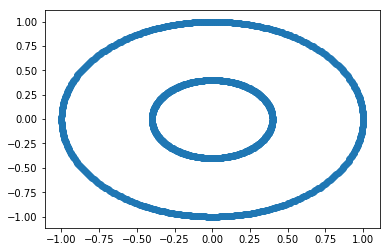

In [13]:
plt.scatter(X[:,0], X[:,1])
plt.show()

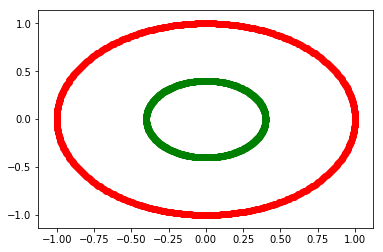

In [14]:
 for ix in range(X.shape[0]):
        if y[ix] == 0:
            plt.scatter(X[ix,0], X[ix,1], color='red')
        else:
            plt.scatter(X[ix,0], X[ix,1], color='green')
            
plt.show()

In [18]:
Y =np_utils.to_categorical(y)
print (Y.shape)

for ix in range(10):
    print (Y[ix], "---", y[ix])

(1000, 2)
[0. 1.] --- 1
[0. 1.] --- 1
[1. 0.] --- 0
[1. 0.] --- 0
[1. 0.] --- 0
[0. 1.] --- 1
[0. 1.] --- 1
[0. 1.] --- 1
[1. 0.] --- 0
[1. 0.] --- 0


In [20]:
split = int(0.8* X.shape[0])
X_train=X[:split]
X_test=X[split:]

y_train = Y[:split]
y_test = Y[split:]

print (X_train.shape)

(800, 2)
